# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv")
df.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [2]:
df.shape

(258000, 4)

Questions

1. Delete unnamed columns

In [3]:
df.dropna(axis=1)

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
...,...,...,...,...
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl


In [4]:
df.isnull().sum()

year       0
name       0
percent    0
sex        0
dtype: int64

2. Show the distribution of male and female

In [5]:
df['sex'].value_counts()

boy     129000
girl    129000
Name: sex, dtype: int64

3. Show the top 5 most preferred names

In [6]:
df['name'].value_counts().head()

Jessie       258
Leslie       247
Jean         244
Guadalupe    244
Lee          240
Name: name, dtype: int64

4. What is the median name occurence in the dataset

In [7]:
df['name'].describe()

count     258000
unique      6782
top       Jessie
freq         258
Name: name, dtype: object

5. Distribution of male and female born count by states

In [8]:
dfg=df.groupby('year')['sex'].value_counts()
dfg

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
              ... 
2006  girl    1000
2007  boy     1000
      girl    1000
2008  boy     1000
      girl    1000
Name: sex, Length: 258, dtype: int64

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Min and max temperature')

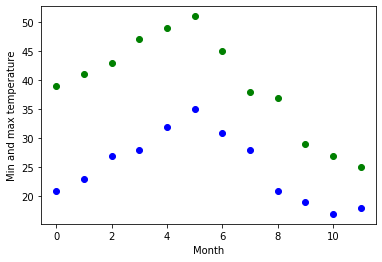

In [9]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
%matplotlib inline
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [10]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

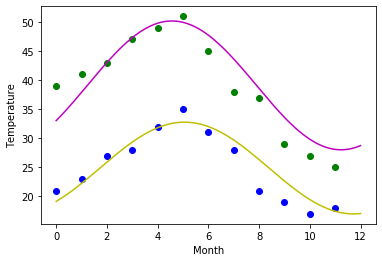

In [11]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()